In [ ]:
pip install tensorflow

     |████████████████████████████████| 462 kB 8.4 MB/s 


In [ ]:
pip install keras numpy matplotlib mnist

In [2]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import seaborn


In [3]:
# load dataset

(xtrain,ytrain), (xtest,ytest) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
xtest.shape

(10000, 28, 28)

In [ ]:
xtrain[0].shape

(28, 28)

In [5]:
xtrain[3450]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 123, 253,  83,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

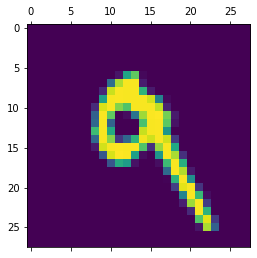

In [6]:
plt.matshow(xtest[7])

In [7]:
# normalization

xtest =xtest/255
xtrain=xtrain/255

In [8]:
xtest[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
# flatten the image into 28*28 to 784

xtrain = xtrain.reshape(-1,784)
xtest  = xtest.reshape(-1,784)

In [10]:
xtrain[2].shape

(784,)

In [11]:
# build the model : sequential

# 3 layers 

# first 2 layers 64 neuron and relu function

# output layer and softmax function

model = keras.Sequential()

model.add(Dense(64,activation='relu',input_dim=784)) # input layer
model.add(Dense(64,activation='relu'))  # hidden layer
model.add(Dense(10,activation='softmax')) # output layer


In [12]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [13]:
# train the model

model.fit(xtrain,
          to_categorical(ytrain),
          epochs=9,
          batch_size=32,
          )

Epoch 1/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2774 - accuracy: 0.9184
Epoch 2/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1232 - accuracy: 0.9631
Epoch 3/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0917 - accuracy: 0.9718
Epoch 4/9
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0718 - accuracy: 0.9778
Epoch 5/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0572 - accuracy: 0.9818
Epoch 6/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0495 - accuracy: 0.9843
Epoch 7/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0428 - accuracy: 0.9862
Epoch 8/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0359 - accuracy: 0.9887
Epoch 9/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0314 - accuracy: 0.9899


In [14]:
# evaluate the model
model.evaluate(xtest,to_categorical(ytest))


313/313 [==============================] - 1s 2ms/step - loss: 0.1183 - accuracy: 0.9710


[0.11833211779594421, 0.9710000157356262]

In [15]:
pred = model.predict(xtest)
pred

array([[4.0311141e-10, 1.7474288e-06, 1.3679502e-06, ..., 9.9997818e-01,
        1.6344410e-09, 7.0001349e-08],
       [8.6732151e-13, 3.5187213e-06, 9.9999642e-01, ..., 1.7926283e-12,
        5.9107036e-10, 3.1151663e-18],
       [2.0437556e-08, 9.9879044e-01, 1.3909691e-04, ..., 3.3158186e-04,
        1.8897939e-04, 7.8966856e-08],
       ...,
       [3.3244740e-18, 2.4260116e-13, 5.1233259e-16, ..., 6.6675582e-10,
        4.2402741e-11, 9.2537922e-10],
       [3.1557729e-16, 7.0060082e-13, 4.8632417e-17, ..., 2.8618903e-15,
        7.3442385e-07, 1.1475024e-15],
       [3.4753320e-10, 2.1050152e-17, 2.3245897e-12, ..., 7.0201573e-19,
        8.2810115e-13, 6.2332320e-15]], dtype=float32)

In [17]:
np.argmax(pred[2])

1

Text(87.0, 0.5, 'Truth Values')

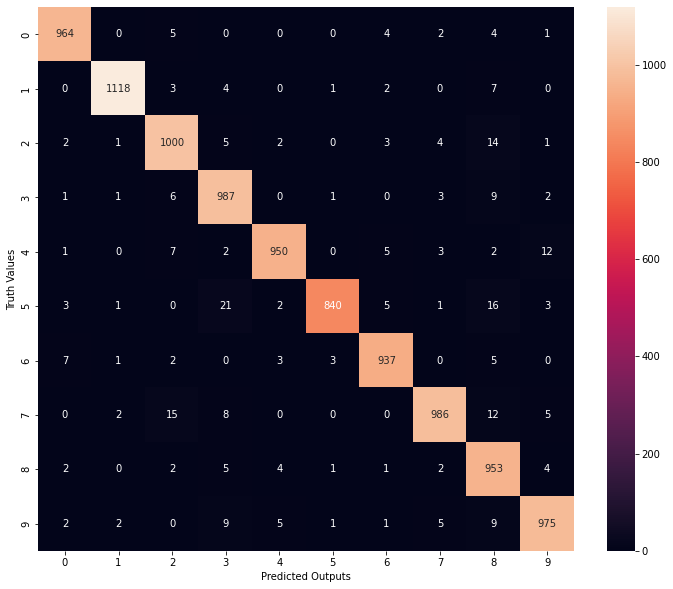

In [20]:
y_pred = model.predict(xtest)
ypred=[np.argmax(i) for i in y_pred]
con_matrix=tf.math.confusion_matrix(labels=ytest,predictions=ypred)
plt.figure(figsize=(12,10))
seaborn.heatmap(con_matrix,annot=True,fmt='d')
plt.xlabel('Predicted Outputs')
plt.ylabel('Truth Values')